In [2]:
import pandas as pd
import json

directory = "data/"

# Load User data
with open(directory+'yelp_academic_dataset_user.json', 'r', encoding='utf-8') as f:
    user_data = [json.loads(line) for line in f]
user_df = pd.DataFrame(user_data)

# Load Tip data
with open(directory+'yelp_academic_dataset_tip.json', 'r', encoding='utf-8') as f:
    tip_data = [json.loads(line) for line in f]
tip_df = pd.DataFrame(tip_data)

# Load business data
with open(directory+'yelp_academic_dataset_business.json', 'r', encoding='utf-8') as f:
    business_data = [json.loads(line) for line in f]
business_df = pd.DataFrame(business_data)

# Load review data
with open(directory+'yelp_academic_dataset_review.json', 'r', encoding='utf-8') as f:
    review_data = [json.loads(line) for line in f]
review_df = pd.DataFrame(review_data)

# Load check-in data
with open(directory+'yelp_academic_dataset_checkin.json', 'r', encoding='utf-8') as f:
    checkin_data = [json.loads(line) for line in f]
checkin_df = pd.DataFrame(checkin_data)

# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

ModuleNotFoundError: No module named 'seaborn'

### Rating Distribution: Reviews Table

### Business Categories Distribution: Business Table

<Figure size 1000x600 with 0 Axes>

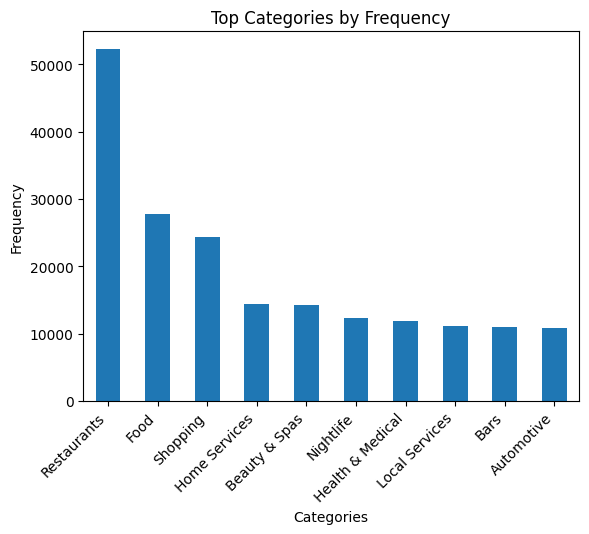

In [13]:

categories = business_df['categories'].dropna().str.split(', ').sum()
category_counts = Counter(categories)

category_counts_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)

top_categories = category_counts_df.head(10)
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', legend=False)
plt.title("Top Business Categories by Frequency")
plt.ylabel("Frequency")
plt.xlabel("Categories")
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
print(f"Number of categories found: {len(category_counts)}")

Number of categories found: 1311


In [ ]:
user_friend_map = user_df.set_index('user_id')['friends'].str.split(', ').to_dict()

# Helper function to check if two users are friends
def are_friends(user1, user2):
    return user2 in user_friend_map.get(user1, [])

AttributeError: 'dict' object has no attribute 'head'

In [ ]:
def find_users_with_friends(reviews, n):
    results = []
    grouped_reviews = reviews.groupby('business_id')
    count = 0

    for business_id, group in grouped_reviews:
        users = group['user_id'].tolist()
        for user1 in users:
            # Find friends who reviewed the same business
            friends = [user2 for user2 in users if user2 != user1 and are_friends(user1, user2)]
            if friends:  # Only include users with friends who reviewed the same business
                results.append({'user_id': user1, 'business_id': business_id, 'friends': friends})
                count += 1
                if count >= n:
                    # Stop early if we reach n users
                    return pd.DataFrame(results)

    return pd.DataFrame(results)

sampled_users_df = find_users_with_friends(review_df, n=n)
sampled_users_df

,user_id,business_id,friends
0,5IY6Kb6BqNINb0oc1p6a7g,--7PUidqRWpRSpXebiyxTg,"[3YhG4h4Ok654iVfqdmkuRg, Q5jOFJYhIsN8ouJ1rnsLQQ]"
1,3YhG4h4Ok654iVfqdmkuRg,--7PUidqRWpRSpXebiyxTg,[5IY6Kb6BqNINb0oc1p6a7g]
2,Q5jOFJYhIsN8ouJ1rnsLQQ,--7PUidqRWpRSpXebiyxTg,[5IY6Kb6BqNINb0oc1p6a7g]
3,t3yOpTibhuvd-Lt7FMvqKg,--7jw19RH9JKXgFohspgQw,[PKHjotBgOEaQ3d5VSGR71Q]
4,PKHjotBgOEaQ3d5VSGR71Q,--7jw19RH9JKXgFohspgQw,[t3yOpTibhuvd-Lt7FMvqKg]
...,...,...,...
95,Kf5PVQUdDvQYf-MXoeWqZA,--sXnWH9Xm6_NvIjyuA99w,"[Zfbx8Tyh7kuWk3R0lCqGyQ, _BcWyKQL16ndpBdggh2kN..."
96,c78V-rj8NQcQjOI8KP3UEA,--sXnWH9Xm6_NvIjyuA99w,"[_hPjqzQDiyw1-4U_IAETpg, Kf5PVQUdDvQYf-MXoeWqZA]"
97,d3RdCKUa-1ZU6rhcyFRDTQ,--sXnWH9Xm6_NvIjyuA99w,[Kf5PVQUdDvQYf-MXoeWqZA]
98,PkNs-Rw6MHQfu6j5pBZMMw,--sXnWH9Xm6_NvIjyuA99w,"[_hPjqzQDiyw1-4U_IAETpg, Kf5PVQUdDvQYf-MXoeWqZA]"


In [7]:
import random

def pair_with_friends_and_strangers(sampled_users, reviews):
    results = []
    grouped_reviews = reviews.groupby('business_id')
    for _, row in sampled_users.iterrows():
        user_id = row['user_id']
        business_id = row['business_id']
        friends = row['friends']
        
        # Get all users who reviewed the same business
        users = grouped_reviews.get_group(business_id)['user_id'].tolist()
        
        # Find a random friend and a random stranger
        friend = random.choice(friends)
        strangers = [u for u in users if u != user_id and u not in friends]
        if strangers:
            stranger = random.choice(strangers)
            results.append({
                'user_id': user_id,
                'business_id': business_id,
                'friend_id': friend,
                'stranger_id': stranger
            })
    return pd.DataFrame(results)

# Apply the function to pair users
pairs_df = pair_with_friends_and_strangers(sampled_users_df, review_df)

In [ ]:
merged_pairs = pairs_df.merge(
    review_df[['user_id', 'business_id', 'stars']],
    left_on=['user_id', 'business_id'],
    right_on=['user_id', 'business_id'],
    suffixes=('', '_user')
).merge(
    review_df[['user_id', 'business_id', 'stars']],
    left_on=['friend_id', 'business_id'],
    right_on=['user_id', 'business_id'],
    suffixes=('', '_friend')
).merge(
    review_df[['user_id', 'business_id', 'stars']],
    left_on=['stranger_id', 'business_id'],
    right_on=['user_id', 'business_id'],
    suffixes=('', '_stranger')
)

merged_pairs['friend_diff'] = merged_pairs['stars'] - merged_pairs['stars_friend']
merged_pairs['stranger_diff'] = merged_pairs['stars'] - merged_pairs['stars_stranger']

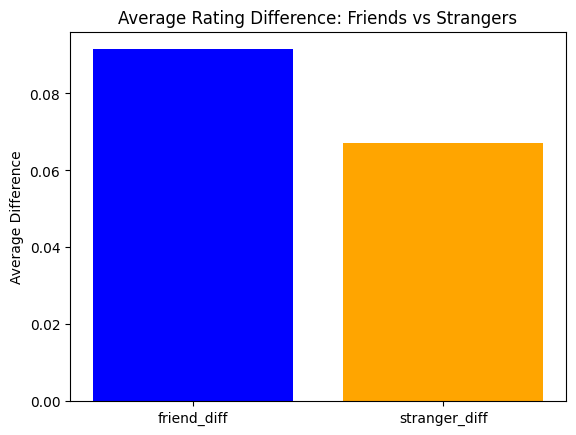

In [ ]:
avg_differences = merged_pairs[['friend_diff', 'stranger_diff']].mean()

plt.bar(avg_differences.index, avg_differences.values, color=['blue', 'orange'])
plt.title('Average Rating Difference: Friends vs Strangers')
plt.ylabel('Average Difference')
plt.xticks(rotation=0)
plt.show()